#Задание 8.1

##Визуализация многомерных данных для классификации. Кластерный анализ для заданной выборки

**Задание**

Воспользуйтесь набором данных USArrests. Выполните иерархическую
кластеризацию штатов.

1) Выполните иерархическую кластеризацию штатов, используя полное
присоединение и евклидово расстояние.

2) Выполните рассечение дендрограммы на высоте, которая приводит к
выделению трех кластеров. Какие штаты входят в каждый из этих кластеров?

3) Выполните иерархическую кластеризацию штатов на основе полного
присоединения и евклидова расстояния после масштабирования
переменных, в результате которого их стандартные отклонения становятся
равными 1.

4) Какой эффект на полученную иерархическую кластеризацию оказывает
масштабирование переменных? На ваш взгляд, следует ли выполнять
масштабирование переменных перед вычислением различий между
наблюдениями? Обоснуйте свой ответ.



Подгрузка данных

In [ ]:
d <- data(USArrests)


In [ ]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


Этот набор данных содержит статистические данные об арестах на 100 000 жителей за нападения, убийства и изнасилования в каждом из 50 штатов США в 1973 году. Также указан процент населения, проживающего в городских районах.

Фрейм данных с 50 наблюдениями по 4 переменным.

* Murder число арестов за убийства (на 100 000)
* Assault число арестов в результате нападений (на 100 000)
* UrbanPop числовое Процент городского населения
* Rape Число арестов за изнасилование (на 100 000)

In [ ]:
# Вычисление евклидова расстояния между штатами
distances <- dist(USArrests, method = "euclidean");distances

In [ ]:
# Использование полного присоединения для иерархической кластеризации
hc_complete <- hclust(distances, method = "complete"); hc_complete


Call:
hclust(d = distances, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 50 


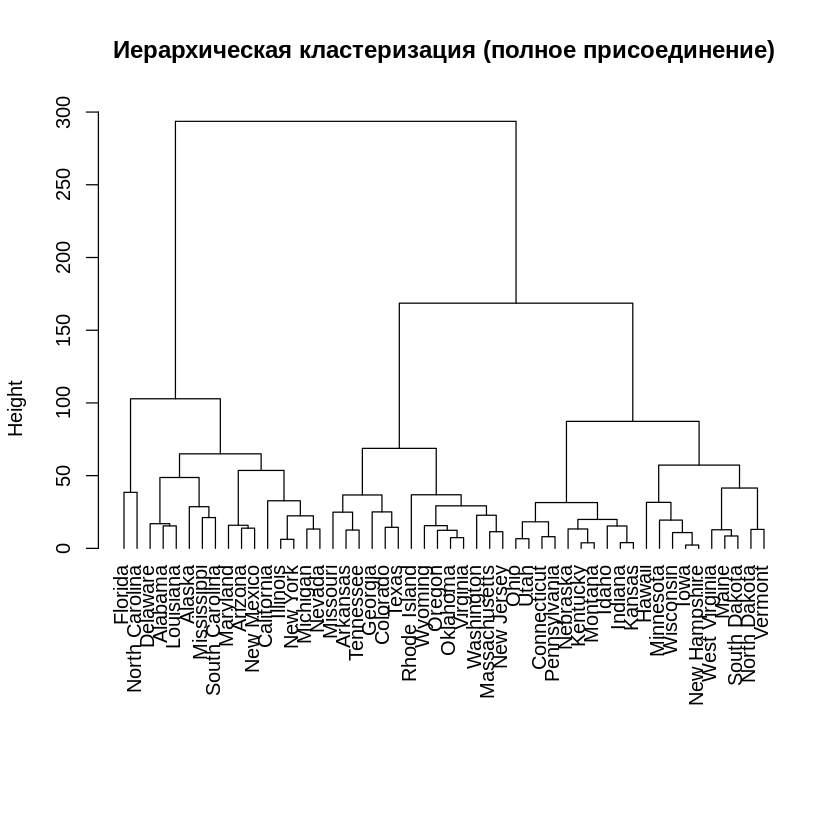

In [ ]:
# Построение дендрограммы
plot(hc_complete, main = "Иерархическая кластеризация (полное присоединение)",
     xlab = "", sub = "", hang = -1)

In [ ]:
# Для сохранения результатов кластеризации можно использовать следующий код:
# Сохранение результатов кластеризации в объект
clusters <- cutree(hc_complete, k = 3) # k - количество кластеров

In [ ]:
# Просмотр, какие штаты входят в каждый кластер
print(split(names(clusters), clusters))

$`1`
 [1] "Alabama"        "Alaska"         "Arizona"        "California"    
 [5] "Delaware"       "Florida"        "Illinois"       "Louisiana"     
 [9] "Maryland"       "Michigan"       "Mississippi"    "Nevada"        
[13] "New Mexico"     "New York"       "North Carolina" "South Carolina"

$`2`
 [1] "Arkansas"      "Colorado"      "Georgia"       "Massachusetts"
 [5] "Missouri"      "New Jersey"    "Oklahoma"      "Oregon"       
 [9] "Rhode Island"  "Tennessee"     "Texas"         "Virginia"     
[13] "Washington"    "Wyoming"      

$`3`
 [1] "Connecticut"   "Hawaii"        "Idaho"         "Indiana"      
 [5] "Iowa"          "Kansas"        "Kentucky"      "Maine"        
 [9] "Minnesota"     "Montana"       "Nebraska"      "New Hampshire"
[13] "North Dakota"  "Ohio"          "Pennsylvania"  "South Dakota" 
[17] "Utah"          "Vermont"       "West Virginia" "Wisconsin"    



3) Выполните иерархическую кластеризацию штатов на основе полного присоединения и евклидова расстояния после масштабирования переменных, в результате которого их стандартные отклонения становятся равными 1.

In [ ]:
# Загрузка данных
data(USArrests)
# Преобразование данных в формат, который может быть использован для кластеризации
df <- as.data.frame(scale(USArrests)) #scale(USArrests) - масштабирование датасета
# Выполнение кластеризации
hc <- hclust(dist(df), method = "ward.D2")
# Определение границ кластеров
groups <- cutree(hc, k = 4)
# Вывод результатов кластеризации
print(split(names(groups), groups))
table(groups)

$`1`
[1] "Alabama"        "Georgia"        "Louisiana"      "Mississippi"   
[5] "North Carolina" "South Carolina" "Tennessee"     

$`2`
 [1] "Alaska"     "Arizona"    "California" "Colorado"   "Florida"   
 [6] "Illinois"   "Maryland"   "Michigan"   "Nevada"     "New Mexico"
[11] "New York"   "Texas"     

$`3`
 [1] "Arkansas"      "Connecticut"   "Delaware"      "Hawaii"       
 [5] "Indiana"       "Kansas"        "Kentucky"      "Massachusetts"
 [9] "Missouri"      "New Jersey"    "Ohio"          "Oklahoma"     
[13] "Oregon"        "Pennsylvania"  "Rhode Island"  "Utah"         
[17] "Virginia"      "Washington"    "Wyoming"      

$`4`
 [1] "Idaho"         "Iowa"          "Maine"         "Minnesota"    
 [5] "Montana"       "Nebraska"      "New Hampshire" "North Dakota" 
 [9] "South Dakota"  "Vermont"       "West Virginia" "Wisconsin"    



groups
 1  2  3  4 
 7 12 19 12 

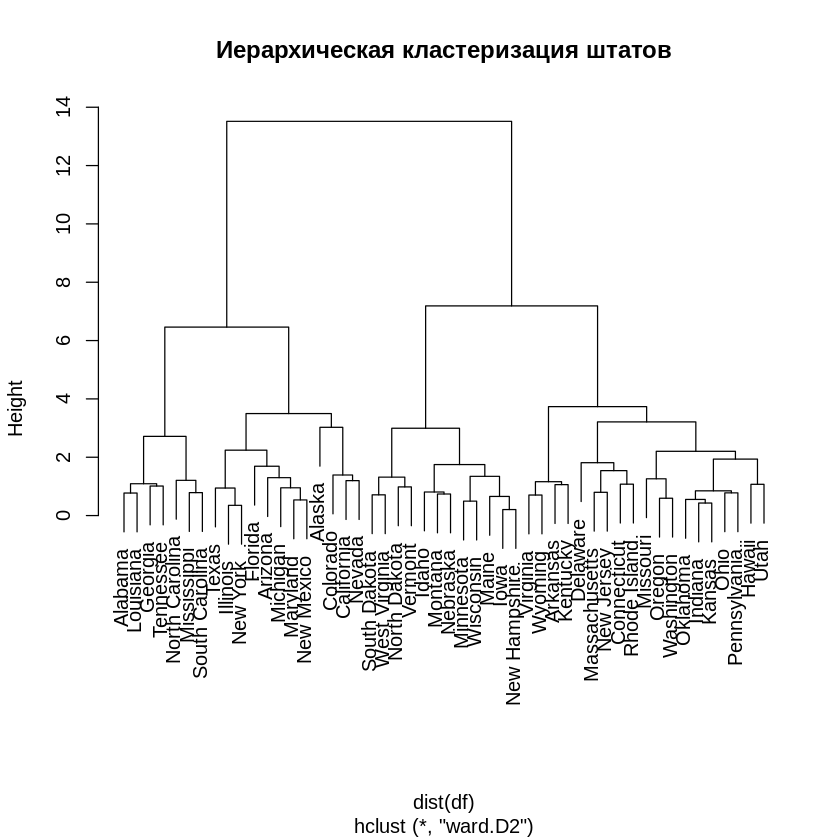

In [ ]:
# Визуализация результатов кластеризации
plot(hc, main = "Иерархическая кластеризация штатов")

In [ ]:

sd(groups) #Вычисление стандартного отклонения в группах

[1] 0.9905678

##4) Какой эффект на полученную иерархическую кластеризацию оказывает масштабирование переменных? На ваш взгляд, следует ли выполнять масштабирование переменных перед вычислением различий между наблюдениями? Обоснуйте свой ответ.

###Масштабирование может привести к слишком большим или  слишком маленьким значениям, которые могут негативно повлиять на кластеризацию. Ухудшению точности определения границ или смещению распрделения значений в кластере. Масштабирование следует выполнять, если между столбцами разница больше/меньше на несколько порядков и тогда, сравнение этих столбцов будет некорректным.

#Задание 8.2 Применение метода опорных векторов и деревьев решений

##Задание
Примените методы, основанные на опорных векторах, для предсказания
уровня расхода топлива автомобилем (высокий или низкий) по данным
из таблицы Auto.

1) Создайте бинарную переменную, принимающую значение 1 для
автомобилей, у которых расход топлива превышает соответствующее
медианное значение, и 0 для автомобилей, у которых расход топлива
меньше этого медианного значения.

2) Постройте по этим данным классификатор на опорных векторах с разными
значениями cost для предсказания уровня расхода топлива (низкий или
высокий). Приведите частоты ошибок, полученные в ходе перекрестной
проверки при разных значениях этого параметра. Прокомментируйте свои
результаты.

3) Теперь повторите (2), используя SVM с радиальным и полиномиальным
ядрами для нескольких значений параметров gamma, degree и cost.
Прокомментируйте свои результаты.

4) Постройте графики, подтверждающие Ваши ответы для пунктов (2) и (3).

Подсказка: можно применить plot() со следующими параметрами:
> plot(svmfit, dat, xl ~ x4)

в которой svmfit содержит построенную вами модель, a dat— это таблица
с вашими данными, Вы можете выполнить для изображения только первой и
четвертой переменных. Однако Вы должны заменить x1 и х4 на правильные
имена переменных.

In [ ]:
A = read.csv("Auto.csv", sep = ';');
head(A)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [ ]:
Auto <- A[1:8] # отделение целевой переменной

Создание классификатора на основе метода опорных векторов

In [ ]:
install.packages("ISLR")
library(ISLR)
gas.med = median(Auto$mpg)
new.var = ifelse(Auto$mpg > gas.med, 1, 0)
Auto$mpglevel = as.factor(new.var)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("e1071")
 library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
set.seed(3255)
tune.out1 = tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out1)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.005064103 

- Detailed performance results:
   cost       error dispersion
1 1e-02 0.085705128 0.02970631
2 1e-01 0.040320513 0.03168372
3 1e+00 0.015064103 0.01752202
4 5e+00 0.012692308 0.01803196
5 1e+01 0.005064103 0.01067713
6 1e+02 0.007628205 0.01228382


Приведите частоты ошибок, полученные в ходе перекрестной проверки при разных значениях этого параметра. Прокомментируйте свои результаты.

При увеличении значения параметра cost - значение ошибки уменьшается в разы

3) Теперь повторите (2), используя SVM с радиальным и полиномиальным ядрами для нескольких значений параметров gamma, degree и cost. Прокомментируйте свои результаты.

In [ ]:
set.seed(21)
tune.out2 = tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.1, 1, 5, 10), degree = c(2, 3, 4)))
summary(tune.out2)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
    5      3

- best performance: 0.04032051 

- Detailed performance results:
   cost degree      error dispersion
1   0.1      2 0.33519231 0.06193003
2   1.0      2 0.22205128 0.05898535
3   5.0      2 0.17641026 0.03383471
4  10.0      2 0.16615385 0.05527691
5   0.1      3 0.10615385 0.06936465
6   1.0      3 0.05794872 0.02067290
7   5.0      3 0.04032051 0.02694588
8  10.0      3 0.04044872 0.02970385
9   0.1      4 0.30487179 0.08252966
10  1.0      4 0.22717949 0.06525544
11  5.0      4 0.17634615 0.05939206
12 10.0      4 0.16628205 0.04823213


Аналогично предыдущему результату при увеличении параметров degree и cost значение ошибки уменьшается

In [ ]:
set.seed(463)
tune.out3 = tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.1, 1, 5, 10), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out3)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    5   0.1

- best performance: 0.02262821 

- Detailed performance results:
   cost gamma      error dispersion
1   0.1 1e-02 0.09544872 0.04832977
2   1.0 1e-02 0.07532051 0.04699325
3   5.0 1e-02 0.04269231 0.02898463
4  10.0 1e-02 0.02506410 0.03535592
5   0.1 1e-01 0.08788462 0.05673747
6   1.0 1e-01 0.04269231 0.04257148
7   5.0 1e-01 0.02262821 0.01846789
8  10.0 1e-01 0.03025641 0.02604525
9   0.1 1e+00 0.07782051 0.05189379
10  1.0 1e+00 0.05019231 0.04996625
11  5.0 1e+00 0.05788462 0.05917766
12 10.0 1e+00 0.05282051 0.05965344
13  0.1 5e+00 0.48153846 0.08180876
14  1.0 5e+00 0.07775641 0.04756187
15  5.0 5e+00 0.08788462 0.04869681
16 10.0 5e+00 0.08788462 0.04869681
17  0.1 1e+01 0.48153846 0.08180876
18  1.0 1e+01 0.16384615 0.05673566
19  5.0 1e+01 0.15621795 0.05045003
20 10.0 1e+01 0.15621795 0.05045003
21  0.1 1e+02 0.48153846 0.08180876
22  1.0 1e+02 0.48153846

При увеличении значений gamma и cost ошибка наоборот увеличивается, а минимальная ошибка только при минимальных значениях параметров

Постройте графики, подтверждающие Ваши ответы для пунктов (2) и (3).
Графики построены относительно переменных mpglevel и horsepower, в качестве перемнных cost, degree и gammа, были взяты значения, при которых ошибка была минимальна

#Итог: По графикам видно, что они подтверждают значения из пунктов 2 и 3.

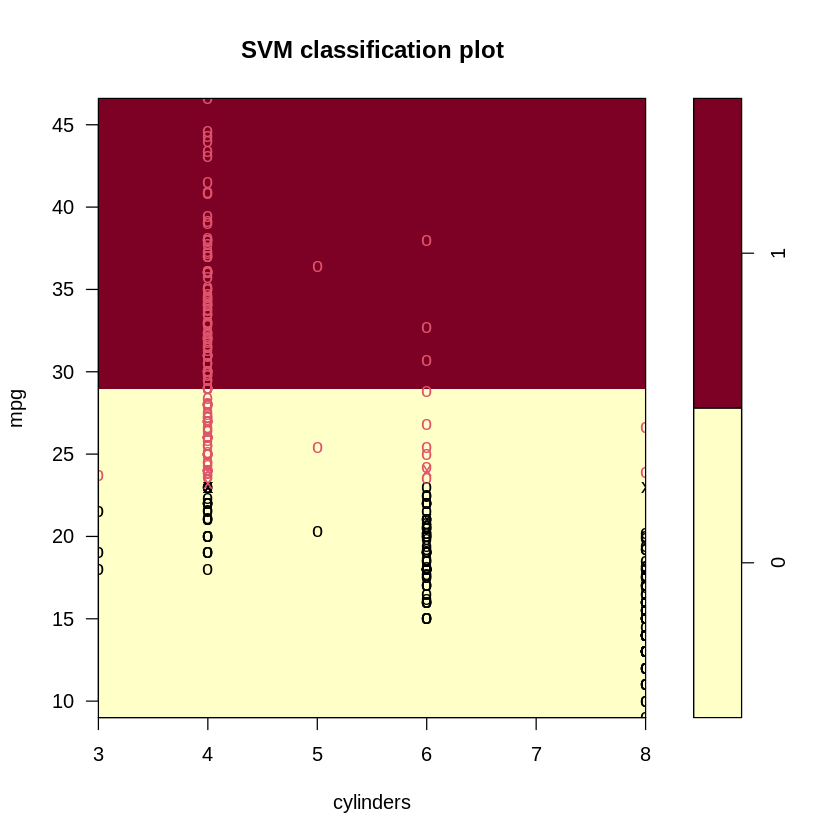

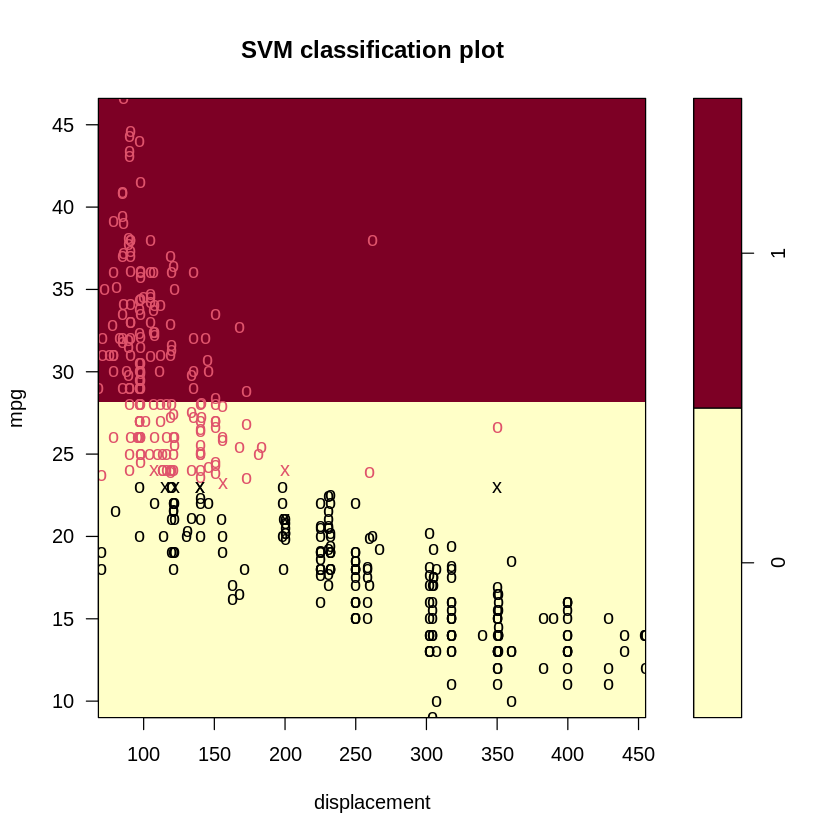

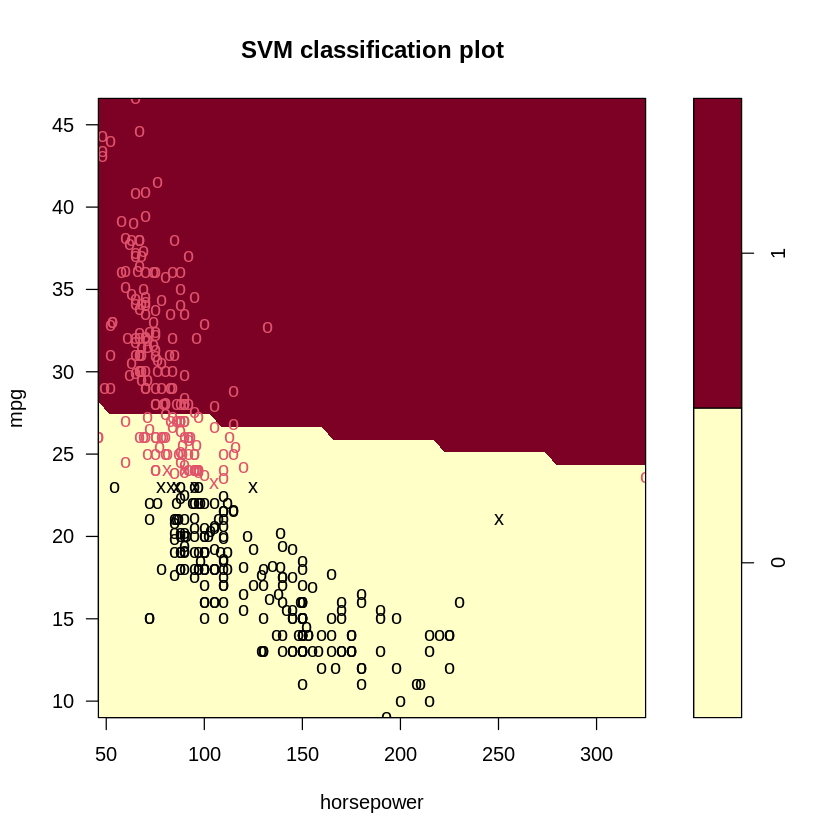

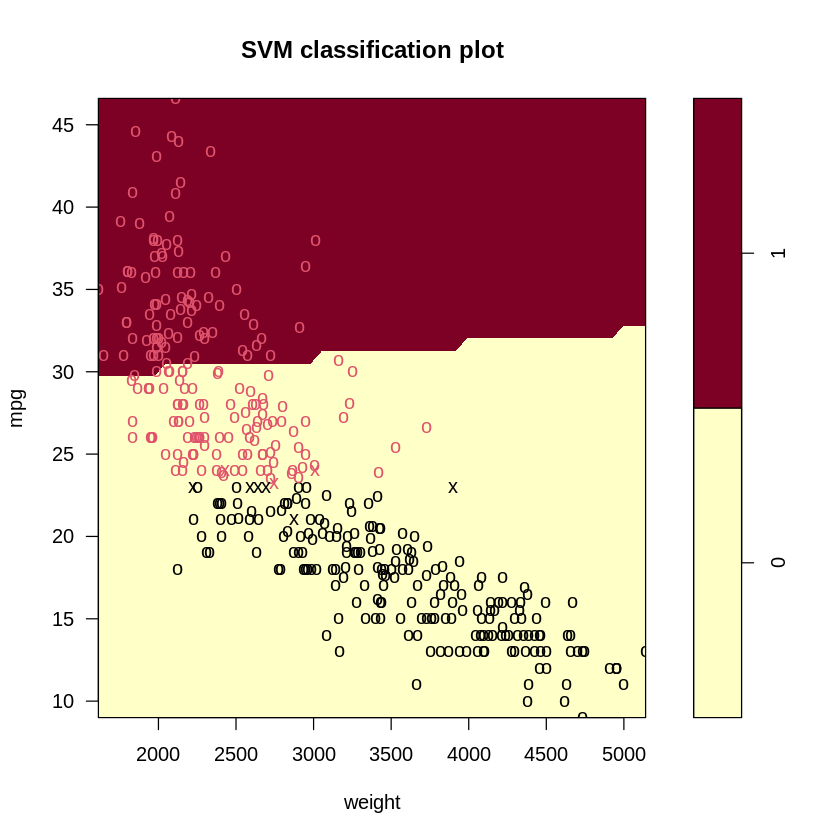

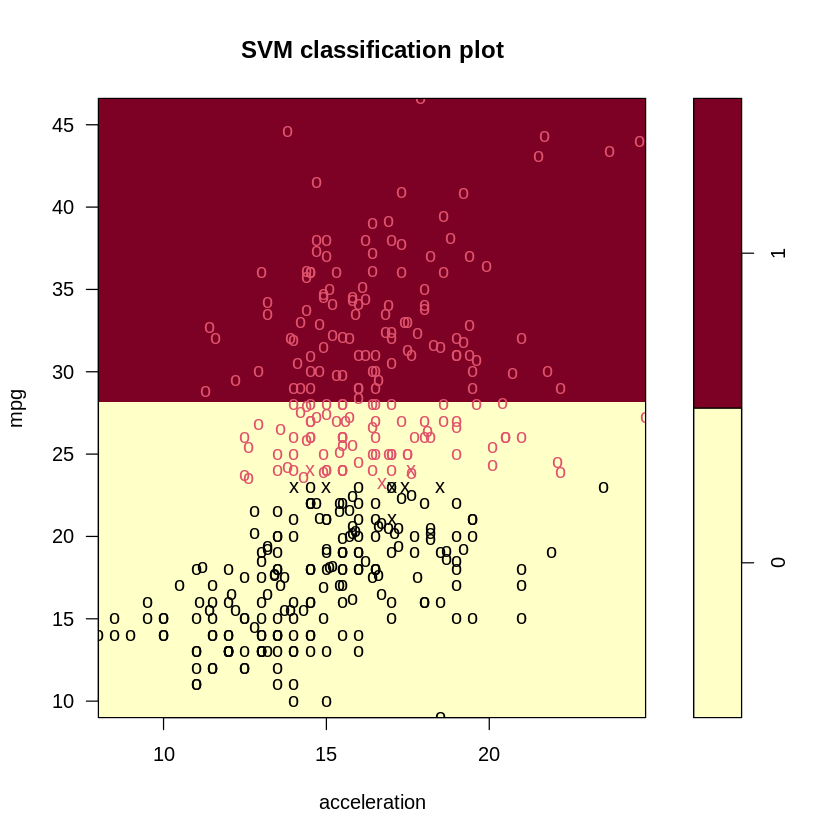

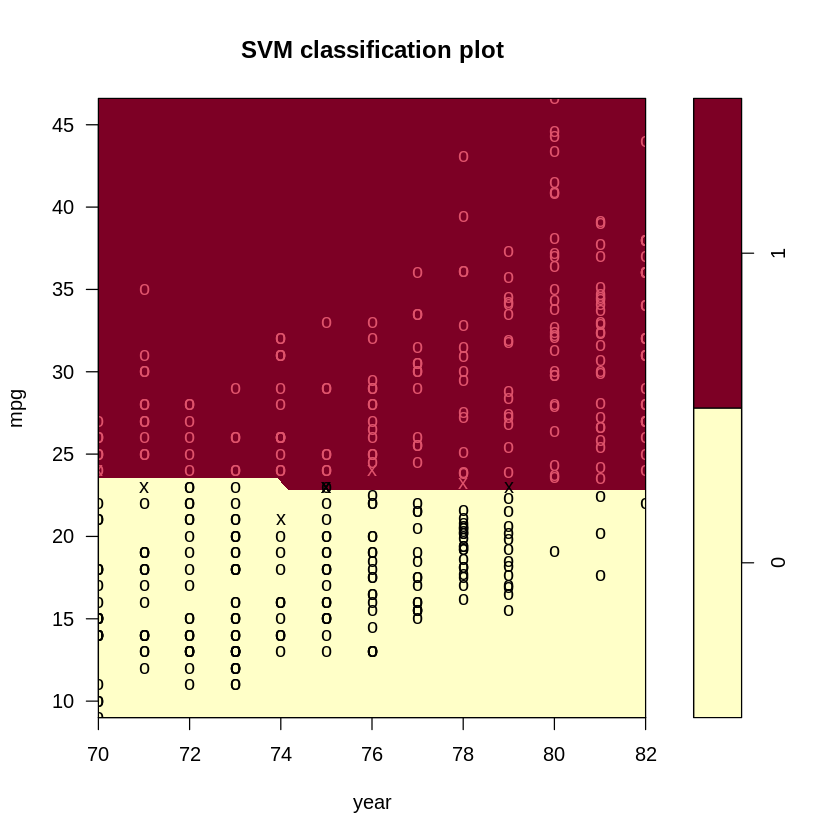

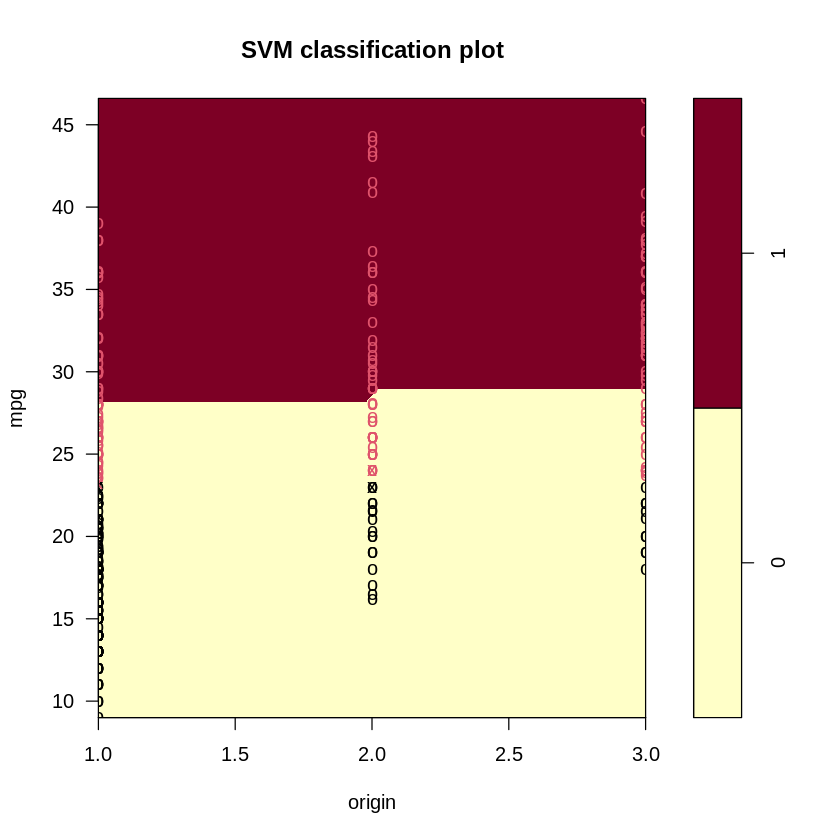

In [ ]:
svm.linear = svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 100)
svm.poly = svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 10,
    degree = 4)
svm.radial = svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 10, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)